In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the data from the CSV file
data = pd.read_csv("grand_coulee_reservoir_elev.csv")
data["date"] = pd.to_datetime(data["date"])

In [86]:
data['doy'] = data['date'].dt.dayofyear
data['month'] = data['date'].dt.month
data.head()


,date,GCL_FB,GCL_FB(m),doy,month
0,1938-05-01,964.4,293.94912,121,5
1,1938-05-02,965.1,294.16248,122,5
2,1938-05-03,965.6,294.31488,123,5
3,1938-05-04,965.7,294.34536,124,5
4,1938-05-05,965.8,294.37584,125,5


In [101]:
data_30y = data[(data['date'] >= '1992-10-01') & (data['date'] <= '2023-09-30')]

In [102]:
avg_30y = data_30y.groupby('doy').mean().reset_index()

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_6624/1888265022.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_30y = data_30y.groupby('doy').mean().reset_index()


In [103]:
# avg_30y[avg_30y['doy'] == 366] = np.nan
# avg_30y

In [107]:
# create dataframe with daterange for a water year
water_year = pd.date_range(start='10/1/2021', end='9/30/2022') # a dummy water year for plotting
water_year = pd.DataFrame(water_year, columns=['date'])
water_year['doy'] = water_year['date'].dt.dayofyear

In [108]:
water_year = water_year.merge(avg_30y[['GCL_FB', 'GCL_FB(m)', 'doy']], on='doy', how='left')

/var/folders/0q/tm370x9d1qdg6nt3w7pcqh_w0000gq/T/ipykernel_6624/2966715335.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']);


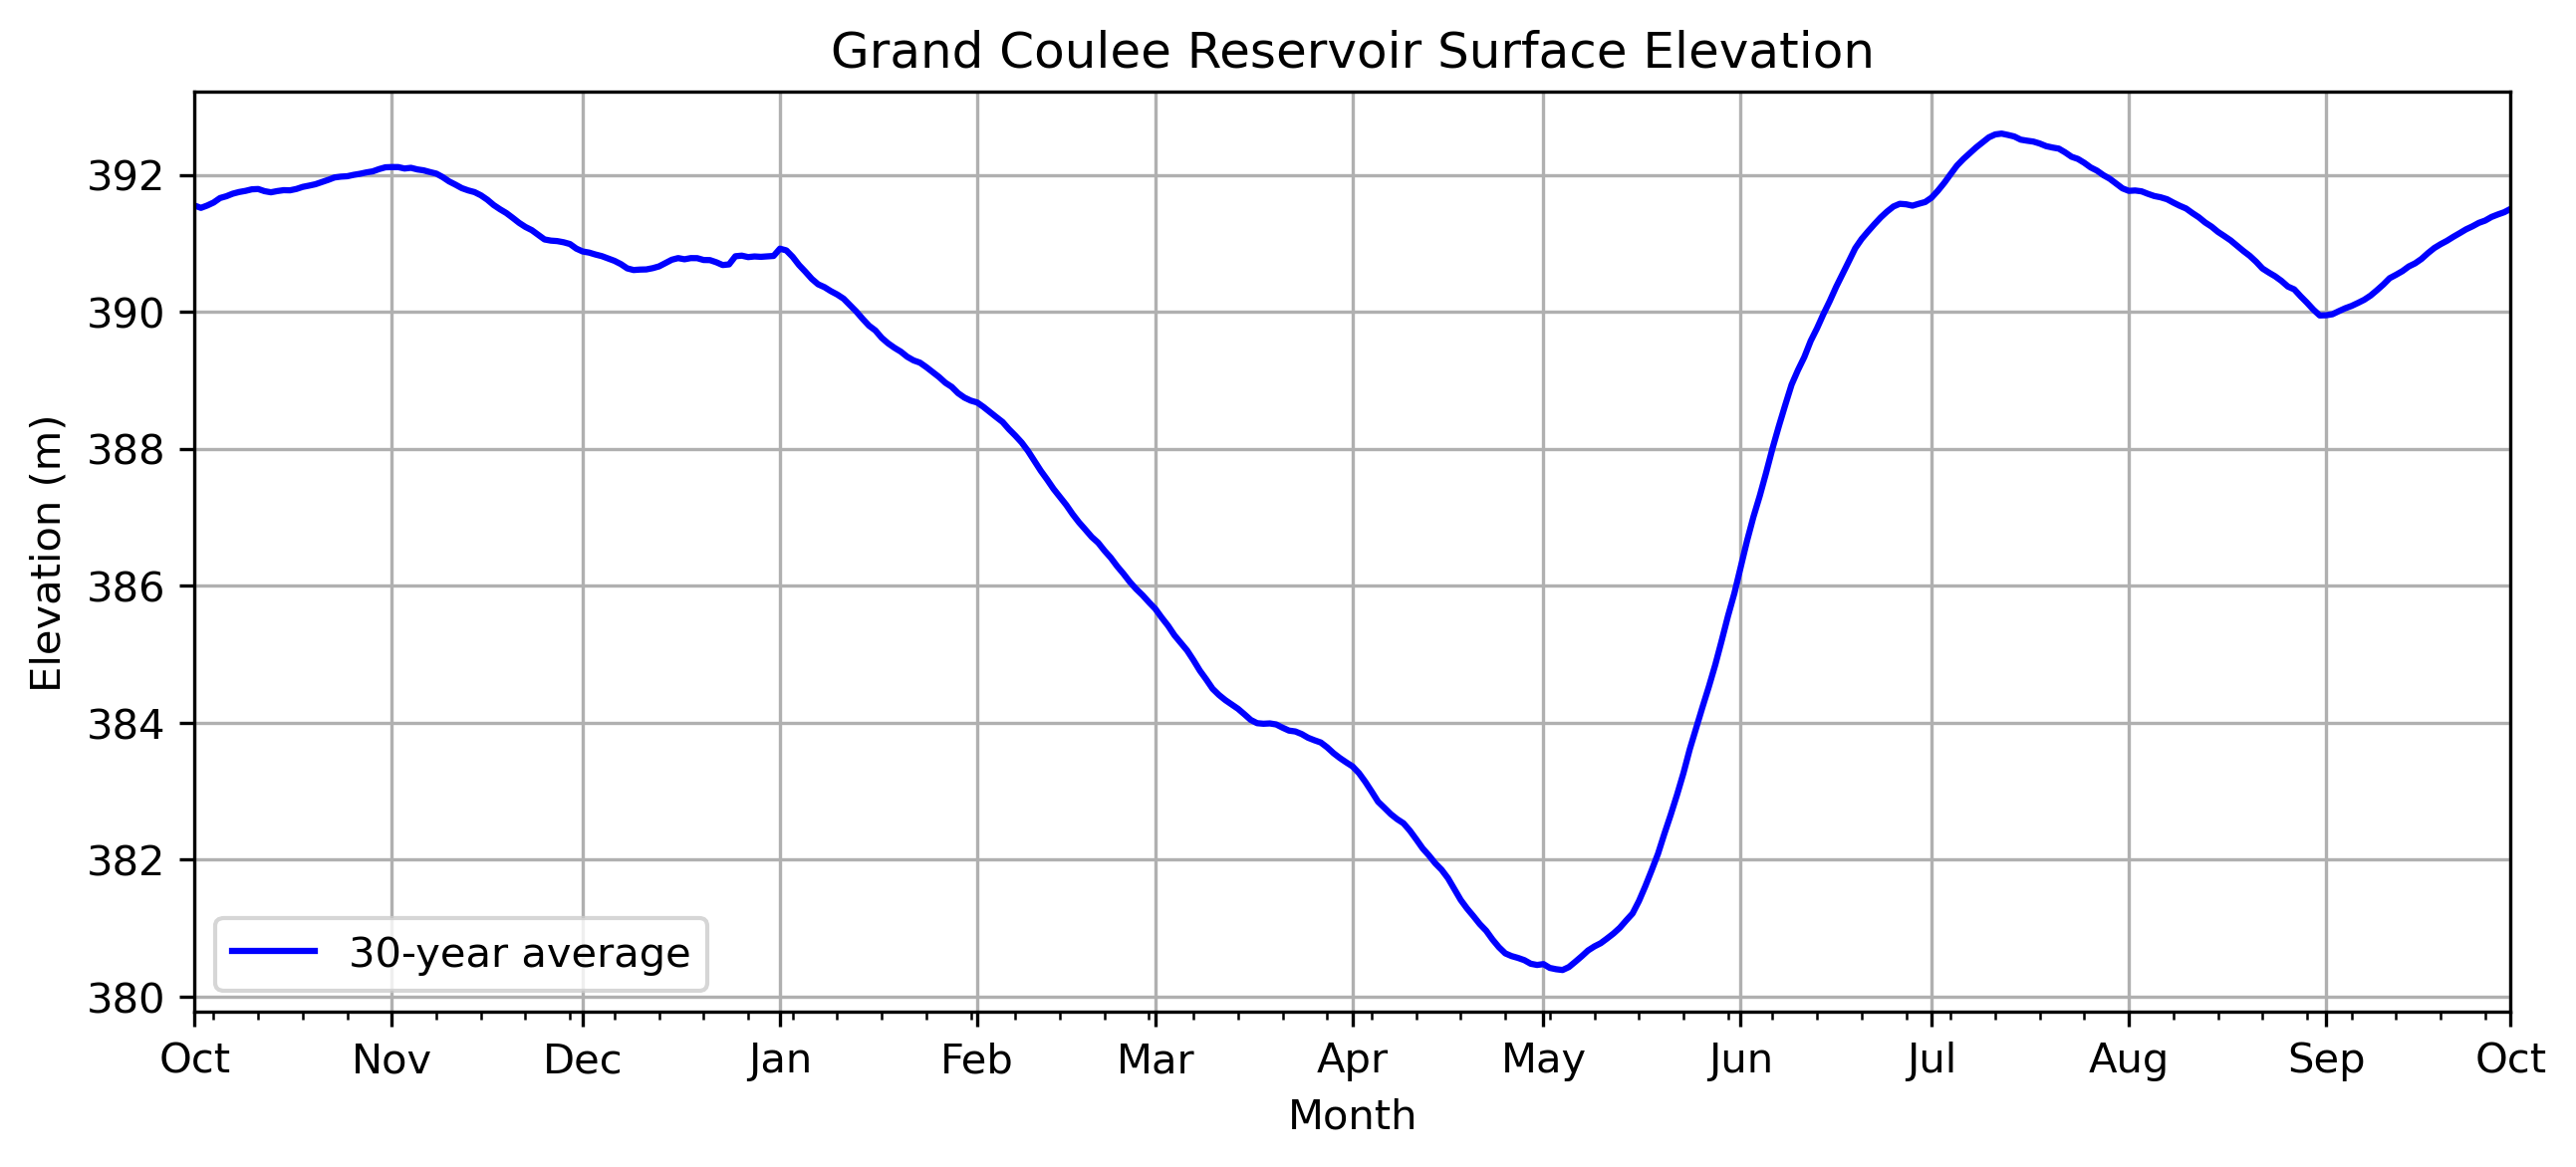

In [122]:
fig, ax = plt.subplots(figsize=(10, 4), dpi=300)
water_year.plot(x='date', y='GCL_FB(m)', color='blue', label='30-year average', ax=ax)
ax.grid(True)
# remove the year from the x-axis
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct']);
ax.set_title('Grand Coulee Reservoir Surface Elevation')
ax.set_ylabel('Elevation (m)')
ax.set_xlabel('Month')

fig.savefig('grand_coulee_reservoir_elev.png', dpi=300)